In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
import string
from wordcloud import WordCloud

In [40]:
df = pd.read_csv(r'C:\Users\admin\Downloads\Twitter\Tweets Data.csv')

In [41]:
df.head()

,Tweets,target(fake=0)
0,We have Good News. Covaxin is first vaccine...,1
1,The country's 'first' indigenous COVID-19 vac...,1
2,"India's first COVID-19 vaccine candidate, COVA...",1
3,AnilDeshmukhNCP PypAyurved @yogrishiramdev You...,1
4,"MoHaP announces 421 new COVID_19 cases, 490 re...",1


In [42]:
df.shape

(3067, 2)

In [43]:
# Removing URls
def remove_URL(text):
    url = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return url

# Remove HTML Tags
def remove_html(text):
    html = re.sub(r'<.*?>' , '' , text)
    return html

# Remove Emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                                "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Lower
def lower(text):
    text = text.lower()
    return text

# Stopwords
def stop_word(text):
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = " ".join(text)
    return text

# Remove Punctuation
'''
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
'''
def remove_punct(text):
    text = re.sub(r"[^A-Za-z0-9 ]" , "" , text)
    return text

In [44]:
df['Tweets'] = df['Tweets'].apply(lambda x : remove_URL(x))
df['Tweets'] = df['Tweets'].apply(lambda x : remove_html(x))
df['Tweets'] = df['Tweets'].apply(lambda x : remove_emoji(x))
df['Tweets'] = df['Tweets'].apply(lambda x : lower(x))
df['Tweets'] = df['Tweets'].apply(lambda x : stop_word(x))
df['Tweets'] = df['Tweets'].apply(lambda x : remove_punct(x))

In [45]:
df.head()

,Tweets,target(fake=0)
0,good news covaxin first vaccine get approval h...,1
1,countrys first indigenous covid19 vaccine cova...,1
2,indias first covid19 vaccine candidate covaxin...,1
3,anildeshmukhncp pypayurved yogrishiramdev boug...,1
4,mohap announces 421 new covid19 cases 490 reco...,1


In [46]:
fake = ''
for i in range(len(df[df["target(fake=0)"]==0])):
    sentence = df[df["target(fake=0)"]==0].reset_index(drop=True).loc[i,"Tweets"]
    fake += sentence+" "

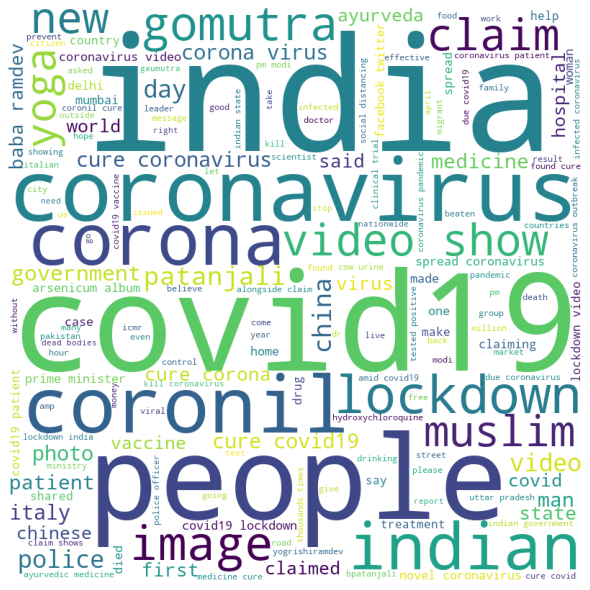

In [47]:
wordcloud_fake = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(fake)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_fake) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [48]:
truth = ''
for i in range(len(df[df["target(fake=0)"]==1])):
    sentence = df[df["target(fake=0)"]==1].reset_index(drop=True).loc[i,"Tweets"]
    truth += sentence+" "

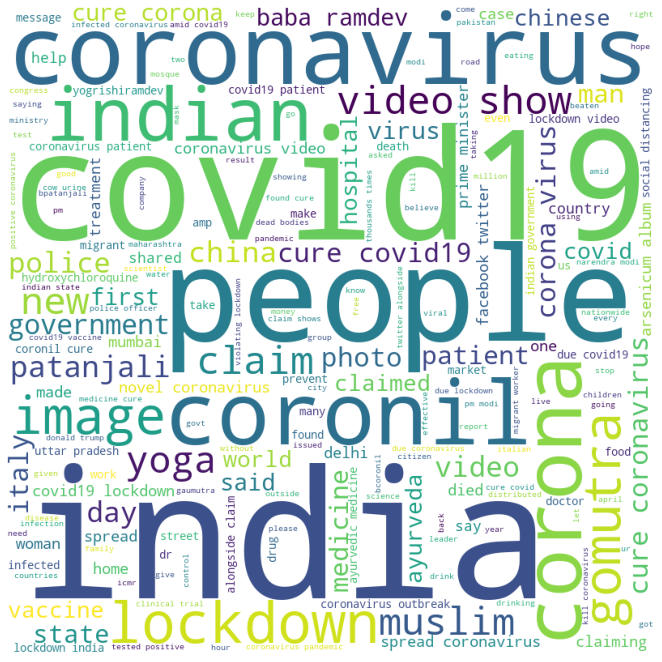

In [49]:
wordcloud_truth = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(fake)

plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloud_truth) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

In [50]:
wordcloud_fake.to_file(r'C:\Users\admin\Downloads\Twitter\Fake.jpeg')
wordcloud_truth.to_file(r'C:\Users\admin\Downloads\Twitter\True.jpeg')

In [51]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

for i in range (len(df)):
    tweet = df.loc[i , "Tweets"]
    tweet = [lemmatizer.lemmatize(word) for word in tweet.split()]
    df.loc[i , "Tweets"] = " ".join(tweet)

In [52]:
df.head()

,Tweets,target(fake=0)
0,good news covaxin first vaccine get approval h...,1
1,country first indigenous covid19 vaccine covax...,1
2,india first covid19 vaccine candidate covaxin ...,1
3,anildeshmukhncp pypayurved yogrishiramdev boug...,1
4,mohap announces 421 new covid19 case 490 recovery,1


In [53]:
# Stemming

ps = PorterStemmer()

for i in range (len(df)):
    tweet = df.loc[i , "Tweets"]
    tweet = [ps.stem(word) for word in tweet.split()]
    df.loc[i , "Tweets"] = " ".join(tweet)

In [54]:
df.head()

,Tweets,target(fake=0)
0,good news covaxin first vaccin get approv huma...,1
1,countri first indigen covid19 vaccin covaxinde...,1
2,india first covid19 vaccin candid covaxin set ...,1
3,anildeshmukhncp pypayurv yogrishiramdev bought...,1
4,mohap announc 421 new covid19 case 490 recoveri,1


In [55]:
df.to_csv('Clean Data.csv' , index=False , header=True)